In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


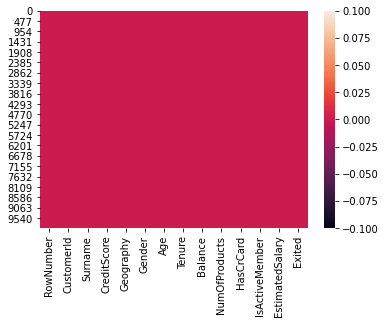

In [7]:
sns.heatmap(dataset.isnull())

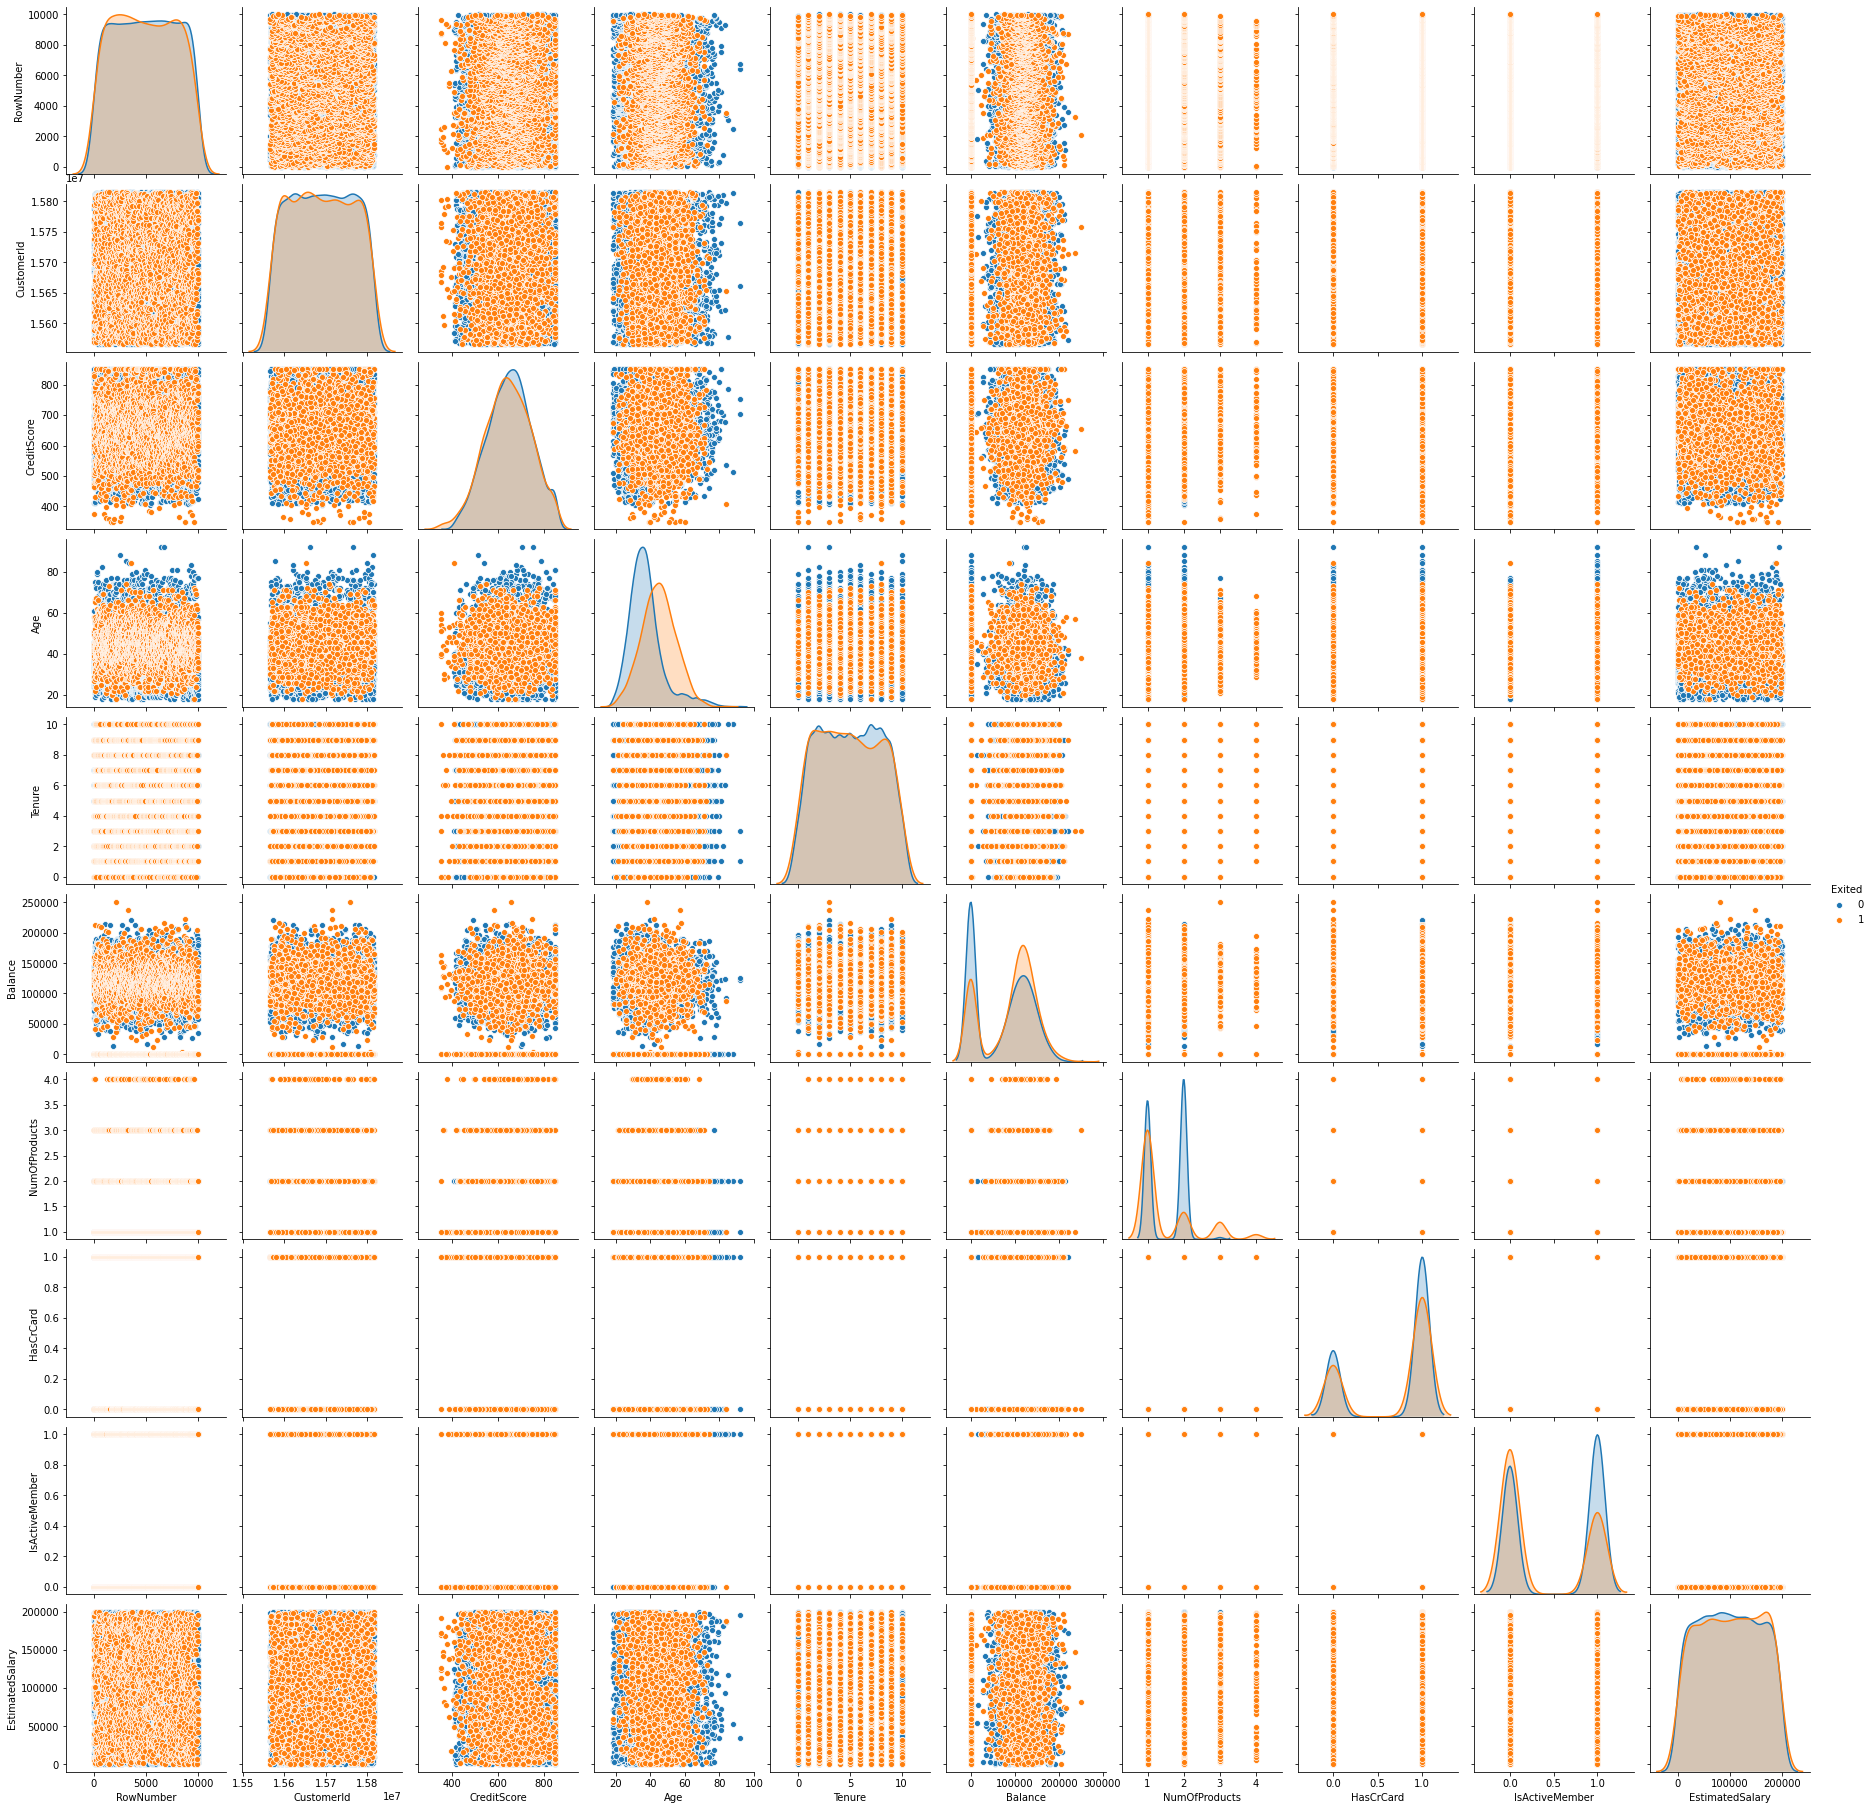

In [6]:
sns.pairplot(dataset, hue='Exited')

In [4]:
X = dataset.iloc[:,3:-1]
y = dataset.iloc[:,-1]

In [5]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()

In [12]:
X['Gender'] = la.fit_transform(X['Gender'])

In [15]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Geography'])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [18]:
print(X)

[[1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Building ANN

In [23]:
ann = tf.keras.models.Sequential()

Creating first input and hidden layer

In [24]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Second hidden layer

In [25]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Output layer

In [27]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training ANN

In [29]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy']) # for binary classifiaction we must have to
# put loss value as binary_cross entropy
# for catagorical classification we are going to use catagorical_crossentropy and activation fuction as softmax

In [31]:
ann.fit(X_train, y_train, batch_size= 32, epochs= 200)

Epoch 1/200
250/250 [==============================] - 0s 947us/step - loss: 0.3370 - accuracy: 0.8616
Epoch 2/200
250/250 [==============================] - 0s 828us/step - loss: 0.3372 - accuracy: 0.8624
Epoch 3/200
250/250 [==============================] - 0s 841us/step - loss: 0.3366 - accuracy: 0.8627
Epoch 4/200
250/250 [==============================] - 0s 827us/step - loss: 0.3364 - accuracy: 0.8631
Epoch 5/200
250/250 [==============================] - 0s 815us/step - loss: 0.3361 - accuracy: 0.8643
Epoch 6/200
250/250 [==============================] - 0s 871us/step - loss: 0.3357 - accuracy: 0.8634
Epoch 7/200
250/250 [==============================] - 0s 902us/step - loss: 0.3352 - accuracy: 0.8650
Epoch 8/200
250/250 [==============================] - 0s 841us/step - loss: 0.3353 - accuracy: 0.8669
Epoch 9/200
250/250 [==============================] - 0s 824us/step - loss: 0.3349 - accuracy: 0.8639
Epoch 10/200
250/250 [==============================] - 0s 816us/step - l

In [36]:
dataset.keys()

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [39]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]


In [41]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

[[1511  191]
 [  84  214]]
              precision    recall  f1-score   support

       False       0.95      0.89      0.92      1702
        True       0.53      0.72      0.61       298

    accuracy                           0.86      2000
   macro avg       0.74      0.80      0.76      2000
weighted avg       0.88      0.86      0.87      2000

